In [1]:
# Loading Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV


# See max columns
pd.set_option('display.max_columns', None)

In [2]:
#loading data set
adult = pd.read_csv("Clean_Data.csv")

#getting columns names
adult.columns

Index(['SRVY_YR', 'URBRRL', 'REGION', 'AGEP_A', 'SEX_A', 'HISP_A',
       'RACEALLP_A', 'MLTFAMFLG_A', 'PHSTAT_A', 'HYPEV_A', 'CHLEV_A',
       'ANGEV_A', 'MIEV_A', 'STREV_A', 'ASEV_A', 'NUMCAN_A', 'HEIGHTTC_A',
       'WEIGHTLBTC_A', 'BMICAT_A', 'DISAB3_A', 'NOTCOV_A', 'PAYWORRY_A',
       'URGNT12MTC_A', 'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A',
       'SMKCIGST_A', 'SMKECIGST_A', 'LEGMSTAT_A', 'PARSTAT_A', 'CITZNSTP_A',
       'SCHCURENR_A', 'POVRATTC_A', 'FSNAP12M_A', 'FDSCAT4_A', 'HOUTENURE_A',
       'CHDEV_A', 'DIA_STATUS'],
      dtype='object')

In [3]:
#Droping columns
adult = adult.drop(columns = ['CHDEV_A','HOUTENURE_A','SCHCURENR_A','CITZNSTP_A','PARSTAT_A','LEGMSTAT_A','MLTFAMFLG_A',
                                  'FSNAP12M_A','HEIGHTTC_A','WEIGHTLBTC_A','NOTCOV_A','ANGEV_A','STREV_A','MIEV_A','HISP_A',
                                  'SMKCIGST_A','ASEV_A','FDSCAT4_A','DISAB3_A','SRVY_YR'])

In [4]:
adult.head()

,URBRRL,REGION,AGEP_A,SEX_A,RACEALLP_A,PHSTAT_A,HYPEV_A,CHLEV_A,NUMCAN_A,BMICAT_A,PAYWORRY_A,URGNT12MTC_A,EMERG12MTC_A,ANXLEVEL_A,DEPLEVEL_A,SMKECIGST_A,POVRATTC_A,DIA_STATUS
0,2,3,85,1,1,2,1,2,0,2,3,0,0,2.0,0.0,3,1.92,0.0
1,4,3,64,1,1,3,1,1,1,4,3,0,0,1.0,0.0,3,10.30,0.0
2,4,3,37,2,1,3,2,2,0,4,3,1,1,3.0,1.0,3,9.36,3.0
3,4,3,72,2,1,2,1,2,0,4,3,0,0,0.0,0.0,3,3.66,0.0
4,1,3,84,2,2,2,1,2,0,3,2,0,0,1.0,0.0,3,0.69,0.0


In [5]:
#Categorizing age
def categorize_age(AGEP_A):
    
    if 18 <= AGEP_A <= 25:
        return 'Young Adult'
    elif 26 <= AGEP_A <= 44:
        return 'Middle Adult'
    elif 45 <= AGEP_A <= 65:
        return 'Late Adult'
    else:
        return 'Retired Adult'

#Applying function to dataframe
adult['Age_cat'] = adult['AGEP_A'].apply(categorize_age)

In [6]:
# Dropping age column
adult = adult.drop(columns = ['AGEP_A'])

In [7]:
#dropping all type 1 Diabetes
adult = adult.drop(adult[adult['DIA_STATUS'] == 2].index)

#having only non-diabetes with diabetes type 2
adult['DIA_STATUS'] = adult['DIA_STATUS'].replace(1, 0)
adult['DIA_STATUS'] = adult['DIA_STATUS'].replace(3, 1)

# Looking at diabetes number
adult.groupby(['DIA_STATUS'])['DIA_STATUS'].count()

DIA_STATUS
0.0    94011
1.0     3255
Name: DIA_STATUS, dtype: int64

In [8]:
# Checking for unique variables for each column
for column in adult.columns:
    unique_values = adult[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'URBRRL': [2 4 1 3]
Unique values in column 'REGION': [3 4 1 2]
Unique values in column 'SEX_A': [1 2]
Unique values in column 'RACEALLP_A': [1 2 6 3 4 5]
Unique values in column 'PHSTAT_A': [2 3 1 4 5]
Unique values in column 'HYPEV_A': [1 2]
Unique values in column 'CHLEV_A': [2 1]
Unique values in column 'NUMCAN_A': [0 1 2 3 4]
Unique values in column 'BMICAT_A': [2 4 3 1]
Unique values in column 'PAYWORRY_A': [3 2 1]
Unique values in column 'URGNT12MTC_A': [0 1 2 4 3 5]
Unique values in column 'EMERG12MTC_A': [0 1 2 4 3]
Unique values in column 'ANXLEVEL_A': [2. 1. 3. 0.]
Unique values in column 'DEPLEVEL_A': [0. 1. 2. 3.]
Unique values in column 'SMKECIGST_A': [3 2 1 4]
Unique values in column 'POVRATTC_A': [ 1.92 10.3   9.36 ...  8.63  8.98  9.67]
Unique values in column 'DIA_STATUS': [0. 1.]
Unique values in column 'Age_cat': ['Retired Adult' 'Late Adult' 'Middle Adult' 'Young Adult']


In [9]:
# Getting Dummy Variables
adult_df = pd.get_dummies(adult, columns = ['URBRRL', 'REGION', 'SEX_A', 'RACEALLP_A', 'PHSTAT_A', 'HYPEV_A',
                                            'CHLEV_A', 'NUMCAN_A', 'BMICAT_A', 'PAYWORRY_A', 'URGNT12MTC_A',
                                            'EMERG12MTC_A', 'ANXLEVEL_A', 'DEPLEVEL_A', 'SMKECIGST_A',
                                            'Age_cat'])


In [10]:
# Split data
X = adult_df.drop('DIA_STATUS', axis = 1)
y = adult_df['DIA_STATUS']

In [11]:
#Scaling and creating the split for the data
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


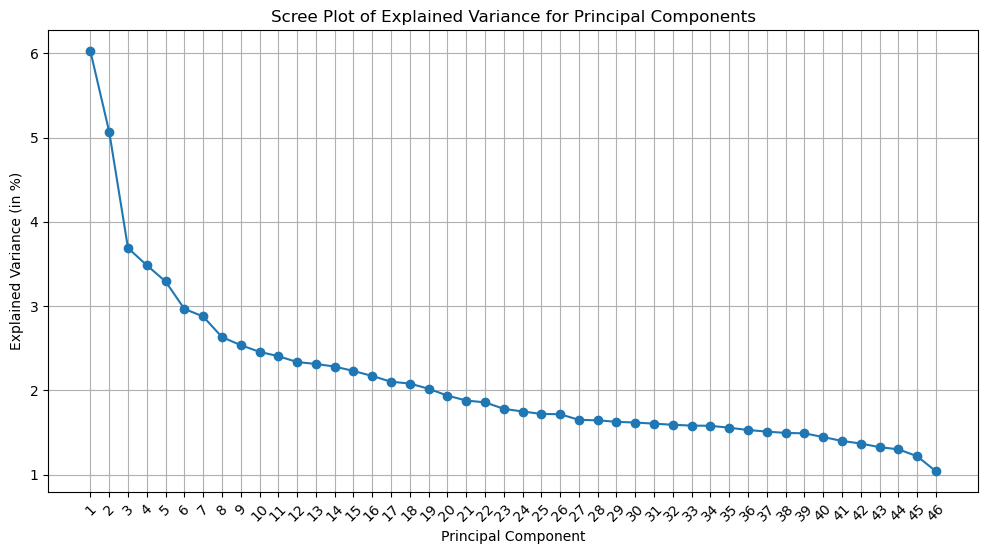

[0.06025302 0.05068795 0.03689894 0.03485687 0.03293352 0.02967763
 0.02877854 0.02633629 0.02537377 0.02458248 0.02406542 0.02337535
 0.02313942 0.02283568 0.02230978 0.02171686 0.0210349  0.02081726
 0.0201992  0.01938817 0.01880208 0.01858438 0.01782114 0.01749662
 0.01721729 0.01717179 0.01651074 0.01645021 0.01627553 0.01618882
 0.01605807 0.01592333 0.01582654 0.01580388 0.01557622 0.01530306
 0.01511832 0.01495747 0.01490777 0.01446902 0.01400628 0.01369831
 0.01326841 0.01301335 0.01219634 0.01040592]


In [12]:
# PCA
pca = PCA(n_components=46)
pca_fit_trans_x_train = pca.fit_transform(X_train)

pca_trans_x_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_

# Create a scree plot to visualize the explained variance
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1),rotation=45)

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

print(pca.explained_variance_ratio_)

In [14]:
# https://xgboost.readthedocs.io/en/latest/parameter.html
# https://www.kaggle.com/code/wongguoxuan/eda-pca-xgboost-classifier-for-beginners
# https://medium.com/@rithpansanga/optimizing-xgboost-a-guide-to-hyperparameter-tuning-77b6e48e289d

from xgboost import XGBClassifier

param_grid = {
    'max_depth': [20, 50, 75],
    'learning_rate': [0.1, 0.2],
    'subsample': [1, 0.7]
}


model = XGBClassifier()  # Create an XGBoost classifier instance

grid_search =  GridSearchCV(model, param_grid, cv=10, scoring='accuracy')

# Train the GridSearchCV using the fit method
grid_search.fit(pca_fit_trans_x_train, y_train)

# Access the best model after training
best_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_model.predict(pca_trans_x_test)
if isinstance(y_train.ravel()[0], (int, np.integer)):  # Check if target variable is integer-like
    predictions = [round(value) for value in y_pred]
else:
    predictions = y_pred
    
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)

# Print the best set of hyperparameters and the corresponding score
print("Best set of hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Accuracy: 96.52%
Accuracy : 0.9651999588773517
[[18771    32]
 [  645     6]]
Best set of hyperparameters:  {'learning_rate': 0.1, 'max_depth': 20, 'subsample': 0.7}
Best score:  0.9651724767885291
